Activité 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def coutglobal(fixe, variable, x):
    cout_global = fixe + variable * x
    return cout_global

In [ ]:
fixe = 1000
variable = 50
quantites = np.linspace(0, 100, 500)

couts = coutglobal(fixe, variable, quantites)

plt.figure(figsize=(10, 6))
plt.plot(quantites, couts, label=f"Coût global (fixe={fixe}, variable={variable})")
plt.title("Graphique du coût global en fonction du nombre de produits")
plt.xlabel("Nombre de produits")
plt.ylabel("Coût global")
plt.legend()
plt.grid(True)
plt.show()

Activité 2

In [42]:
import numpy as np

Les fonctions numpy sont @ et np.dot

Non, la multiplication matrice-vecteur ne fonctionne pas dans les deux sens. Car le nombre de colonnes est de lignes sont différents.

La fonction pour trouver l'inverse est np.linalg.inv

In [43]:
A = np.array([[10, 5], [-4, 1]])
b = np.array([[9000], [50]])

C = A @ b
print(C)

[[ 90250]
 [-35950]]


In [44]:
print(np.linalg.inv(A))

[[ 0.03333333 -0.16666667]
 [ 0.13333333  0.33333333]]


In [45]:
u = np.linalg.inv(A)@b

u_rounded = np.round(u, 2)

print(u_rounded)

[[ 291.67]
 [1216.67]]


Activité 3

In [66]:
#def resolve(A, b):
#    u = np.linalg.inv(A) @ b
#    return u

In [88]:
num_problems = 1000

solutions_found = 0
non_invertible_count = 0

for i in range(num_problems):
    A = np.random.randint(-10, 10, (2, 2)).astype(float)
    
    if np.linalg.det(A) == 0:
        non_invertible_count += 1
        
    # else:
    #     b = np.random.randint(-10, 10, (2, 1)).astype(float)
        
    #     u_rounded = resolve(A, b)
    #     solutions_found += 1

In [89]:
print(f"Bilan :")
# print(f"Nombre de solutions trouvées : {solutions_found}")
print(f"Pourcentage de matrices non inversibles : {round(non_invertible_count/num_problems*100, 2)} %")

Bilan :
Pourcentage de matrices non inversibles : 2.5 %


In [64]:
print(f"Problème {i+1}:")
print(f"A =\n{A}")
print(f"b =\n{b}")
print(f"x (solution) =\n{u_rounded}")
print("-" * 30)

Problème 389:
A =
[[3. 3.]
 [1. 1.]]
b =
[[-7.]
 [-1.]]
x (solution) =
[[0.64]
 [0.2 ]]
------------------------------


Code modulable

In [18]:
import numpy as np

In [17]:
def generate_problems(num_problems=1000, matrix_size=(2, 2), value_range=(-10, 10)):
    non_invertible_count = 0

    for _ in range(num_problems):
        A = np.random.randint(value_range[0], value_range[1], matrix_size).astype(float)
        
        if np.linalg.det(A) == 0:
            non_invertible_count += 1

    percentage_non_invertible = (non_invertible_count / num_problems) * 100

    print(f"Bilan :")
    print(f"Nombre total de problèmes générés : {num_problems}")
    print(f"Nombre de matrices non inversibles : {non_invertible_count}")
    print(f"Pourcentage de matrices non inversibles : {round(percentage_non_invertible, 2)} %")

In [19]:
generate_problems(num_problems=1000, matrix_size=(2, 2), value_range=(-5, 5))

Bilan :
Nombre total de problèmes générés : 1000
Nombre de matrices non inversibles : 57
Pourcentage de matrices non inversibles : 5.7 %


Activité 4

In [93]:
A = np.array([[1, 2, -1, 3, 2], [2, -1, 3, -1, 1], [-1, 3, 2, 2, -3], [1, -1, 1, 2, 3], [1, 4, -1,3,1]]).T
b = np.array([[8], [15], [7], [20], [5]])

In [94]:
print(np.linalg.det(A))

-62.000000000000064


In [95]:
C = A @ b
print(C)

[[56]
 [22]
 [66]
 [78]
 [75]]


Activité 5 : Simplexe (utilisation de scipy)

In [20]:
from scipy.optimize import linprog

c = [-30, -20]

A = [
    [1, 2], 
    [3, 1]
]
b = [16, 24]

x_bounds = (0, None)
y_bounds = (0, None)

result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method='highs')

if result.success:
    print("Solution optimale trouvée :")
    print(f"Nombre d'unités de produit A (x1) : {result.x[0]:.2f}")
    print(f"Nombre d'unités de produit B (x2) : {result.x[1]:.2f}")
    print(f"Profit total maximal : {-result.fun:.2f} €")
else:
    print("La résolution a échoué.")

Solution optimale trouvée :
Nombre d'unités de produit A (x1) : 6.40
Nombre d'unités de produit B (x2) : 4.80
Profit total maximal : 288.00 €


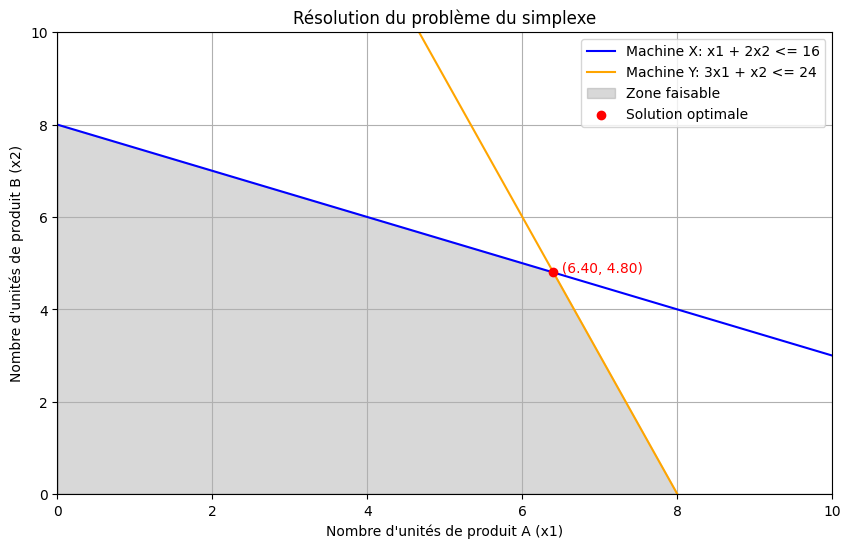

In [ ]:
x = np.linspace(0, 10, 500)
y1 = (16 - x) / 2
y2 = 24 - 3 * x

plt.figure(figsize=(10, 6))

plt.plot(x, y1, label="Machine X: x1 + 2x2 <= 16", color='blue')
plt.plot(x, y2, label="Machine Y: 3x1 + x2 <= 24", color='orange')

plt.fill_between(x, np.minimum(y1, y2), 0, where=(np.minimum(y1, y2) >= 0), color='gray', alpha=0.3, label="Zone faisable")

if result.success:
    plt.scatter(result.x[0], result.x[1], color='red', label="Solution optimale", zorder=5)
    plt.text(result.x[0], result.x[1], f"  ({result.x[0]:.2f}, {result.x[1]:.2f})", color='red')

plt.title("Résolution du problème du simplexe")
plt.xlabel("Nombre d'unités de produit A (x1)")
plt.ylabel("Nombre d'unités de produit B (x2)")
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.legend()
plt.grid(True)

plt.show()